In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [24]:
data=pd.read_csv('Medicine_Details.csv')

In [25]:
print(data.dtypes)

Medicine Name         object
Composition           object
Uses                  object
Side_effects          object
Image URL             object
Manufacturer          object
Excellent Review %     int64
Average Review %       int64
Poor Review %          int64
dtype: object


In [26]:
data.head(1)

,Medicine Name,Composition,Uses,Side_effects,Image URL,Manufacturer,Excellent Review %,Average Review %,Poor Review %
0,Avastin 400mg Injection,Bevacizumab (400mg),Cancer of colon and rectum Non-small cell lun...,Rectal bleeding Taste change Headache Noseblee...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Roche Products India Pvt Ltd,22,56,22


In [27]:
data[['Main Element', 'Numeric Value']] = data['Composition'].str.extract(r'([a-zA-Z\s]+)\s*\((\d+mg)\)')

In [28]:
data = data.drop(columns=['Composition'])

In [29]:
data= data[['Medicine Name', 'Main Element', 'Numeric Value', 'Uses', 'Side_effects', 
         'Image URL', 'Manufacturer', 'Excellent Review %', 'Average Review %', 'Poor Review %']]

In [30]:
data.head(3)

,Medicine Name,Main Element,Numeric Value,Uses,Side_effects,Image URL,Manufacturer,Excellent Review %,Average Review %,Poor Review %
0,Avastin 400mg Injection,Bevacizumab,400mg,Cancer of colon and rectum Non-small cell lun...,Rectal bleeding Taste change Headache Noseblee...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Roche Products India Pvt Ltd,22,56,22
1,Augmentin 625 Duo Tablet,Amoxycillin,500mg,Treatment of Bacterial infections,Vomiting Nausea Diarrhea Mucocutaneous candidi...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Glaxo SmithKline Pharmaceuticals Ltd,47,35,18
2,Azithral 500 Tablet,Azithromycin,500mg,Treatment of Bacterial infections,Nausea Abdominal pain Diarrhea,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Alembic Pharmaceuticals Ltd,39,40,21


In [31]:
data.columns

Index(['Medicine Name', 'Main Element', 'Numeric Value', 'Uses',
       'Side_effects', 'Image URL', 'Manufacturer', 'Excellent Review %',
       'Average Review %', 'Poor Review %'],
      dtype='object')

In [32]:
data= data[['Medicine Name', 'Main Element', 'Numeric Value', 'Excellent Review %', 'Average Review %', 'Poor Review %']]

In [33]:
data.head(5)

,Medicine Name,Main Element,Numeric Value,Excellent Review %,Average Review %,Poor Review %
0,Avastin 400mg Injection,Bevacizumab,400mg,22,56,22
1,Augmentin 625 Duo Tablet,Amoxycillin,500mg,47,35,18
2,Azithral 500 Tablet,Azithromycin,500mg,39,40,21
3,Ascoril LS Syrup,NaN,NaN,24,41,35
4,Aciloc 150 Tablet,Ranitidine,150mg,34,37,29


In [34]:
data.isnull().sum()


Medicine Name            0
Main Element          3710
Numeric Value         3710
Excellent Review %       0
Average Review %         0
Poor Review %            0
dtype: int64

In [35]:
data= data.dropna(subset=['Main Element'])

In [36]:
data['Numeric Value(in mg)'] = data['Numeric Value'].str.extract('(\d+)').astype(int)
data.drop("Numeric Value", inplace=True, axis=1)

In [37]:
data.head(6)

,Medicine Name,Main Element,Excellent Review %,Average Review %,Poor Review %,Numeric Value(in mg)
0,Avastin 400mg Injection,Bevacizumab,22,56,22,400
1,Augmentin 625 Duo Tablet,Amoxycillin,47,35,18,500
2,Azithral 500 Tablet,Azithromycin,39,40,21,500
4,Aciloc 150 Tablet,Ranitidine,34,37,29,150
5,Allegra 120mg Tablet,Fexofenadine,35,42,23,120
6,Avil 25 Tablet,Pheniramine,40,34,26,25


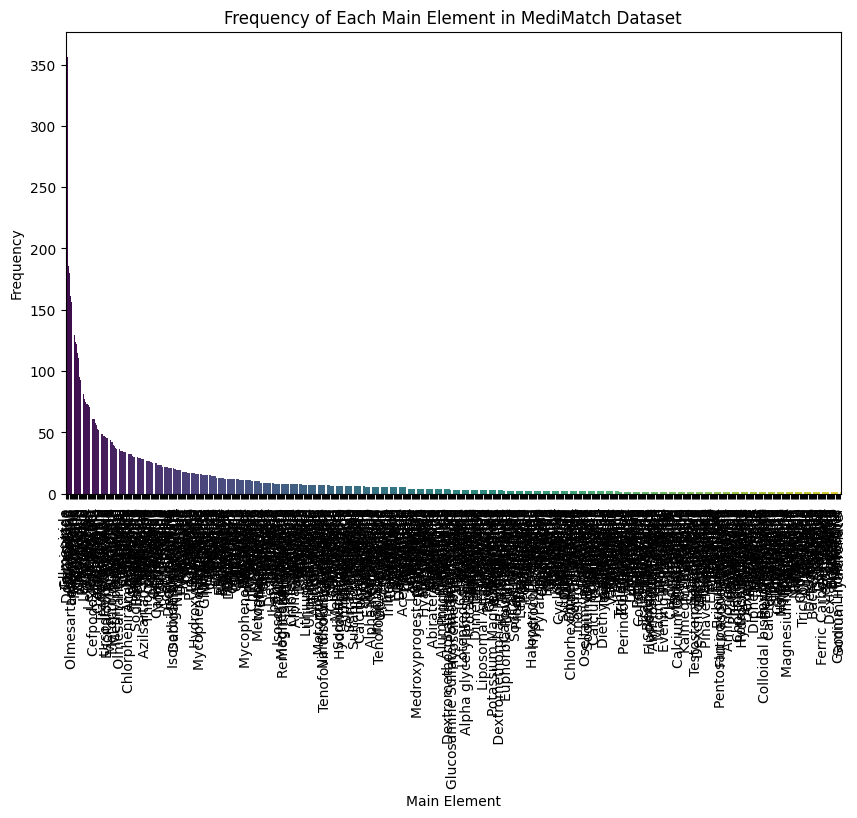

In [38]:
main_element_counts = data['Main Element'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=main_element_counts.index, y=main_element_counts.values, palette="viridis")
plt.xticks(rotation=90)
plt.xlabel('Main Element')
plt.ylabel('Frequency')
plt.title('Frequency of Each Main Element in MediMatch Dataset')
plt.show()

In [39]:
data = pd.get_dummies(data, columns=['Main Element'], prefix='Element')

In [40]:
data.head()

,Medicine Name,Excellent Review %,Average Review %,Poor Review %,Numeric Value(in mg),Element_,Element_,Element_ Albendazole,Element_ Solifenacin,Element_ Alpha Lipoic Acid,...,Element_Voriconazole,Element_Warfarin,Element_Xylitol,Element_Zinc Carnosine,Element_Ziprasidone,Element_Zoledronic acid,Element_Zolmitriptan,Element_Zonisamide,Element_carnitine,Element_phosphate
0,Avastin 400mg Injection,22,56,22,400,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Augmentin 625 Duo Tablet,47,35,18,500,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Azithral 500 Tablet,39,40,21,500,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Aciloc 150 Tablet,34,37,29,150,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,Allegra 120mg Tablet,35,42,23,120,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [44]:
scaler=StandardScaler()
data[['Numeric Value(in mg)', 'Excellent Review %', 'Average Review %', 'Poor Review %']] = scaler.fit_transform(
    data[['Numeric Value(in mg)', 'Excellent Review %', 'Average Review %', 'Poor Review %']]
)